In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
student = pd.read_csv("student_info.csv");

In [3]:
student

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [5]:
student.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
student.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [11]:
student.isna().sum()

study_hours      0
student_marks    0
dtype: int64

In [10]:
# fill missing value...
student['study_hours'] = student['study_hours'].fillna(
    student['study_hours'].mean()
)


In [12]:
student.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

Text(0.5, 1.0, 'Scatter plot of data')

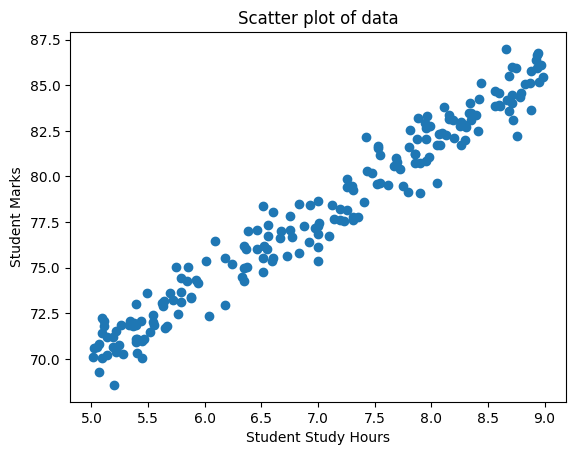

In [14]:
plt.scatter(x = student.study_hours, y = student.student_marks)
plt.xlabel("Student Study Hours");
plt.ylabel("Student Marks");
plt.title("Scatter plot of data")

In [17]:
X = student.drop("student_marks", axis="columns");
y = student.drop("study_hours", axis="columns");
print("shape of X", X.shape)
print("Shape of y", y.shape)

shape of X (200, 1)
Shape of y (200, 1)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=51)
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (160, 1)
Shape of X_test (40, 1)
Shape of y_train (160, 1)
Shape of y_test (40, 1)


In [21]:
from sklearn.linear_model import LinearRegression 

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
lr.predict(X_test)

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [27]:
lr.coef_

array([[3.93571802]])

In [28]:
lr.intercept_

array([50.44735504])

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test, lr.predict(X_test))

0.9514124242154464

<function matplotlib.pyplot.show(close=None, block=None)>

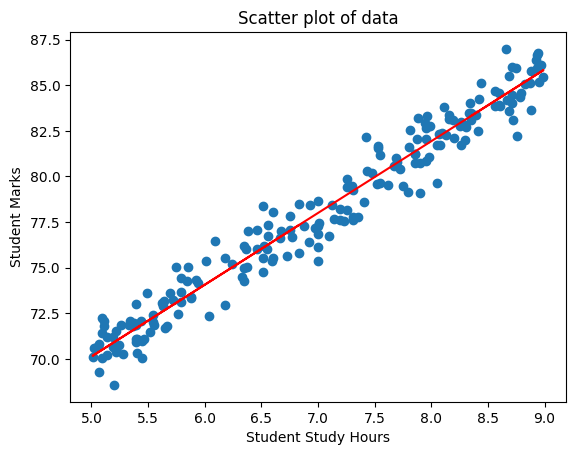

In [32]:
plt.scatter(x = student.study_hours, y = student.student_marks)
plt.xlabel("Student Study Hours");
plt.ylabel("Student Marks");
plt.title("Scatter plot of data")
y_pred = lr.predict(X)
plt.plot(X, y_pred, color = 'red')
plt.show

In [34]:
import joblib
joblib.dump(lr, "student_Mark_predictor_model.pkl")

['student_Mark_predictor_model.pkl']

In [35]:
lr = joblib.load("student_Mark_predictor_model.pkl")

In [36]:
lr.predict([[5]])[0][0]

c:\Users\Saurav Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(70.12594512018406)